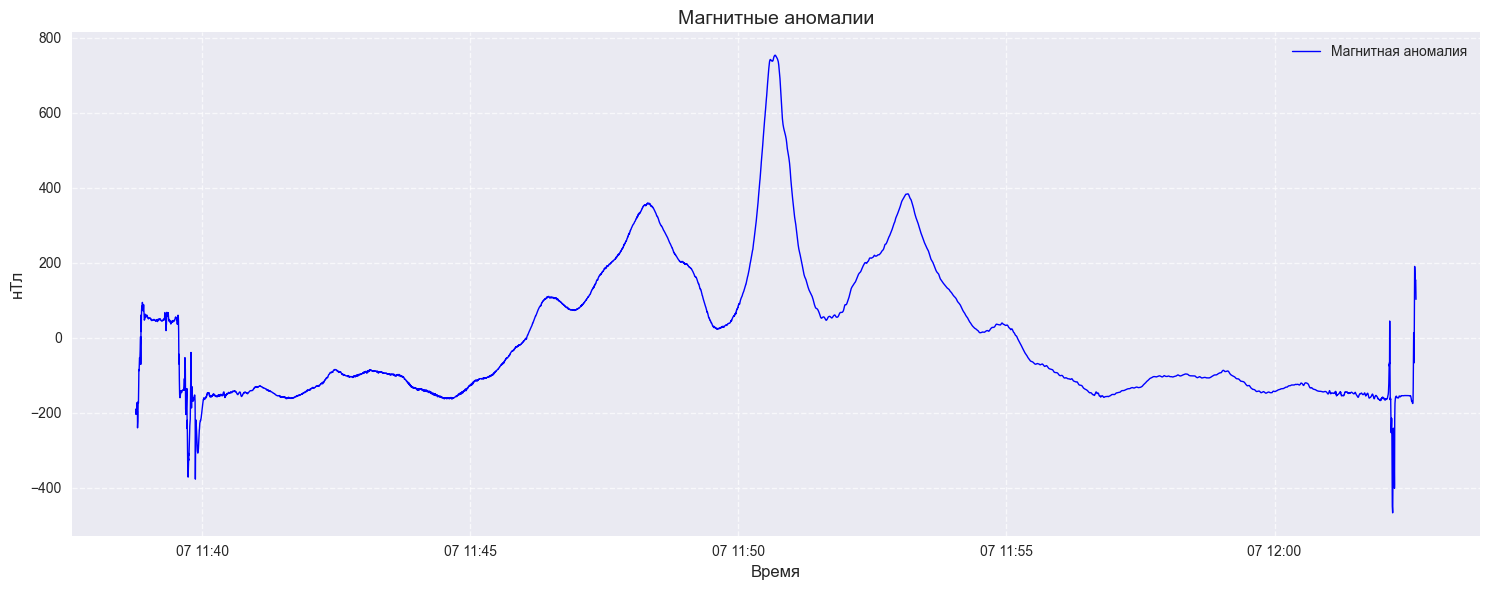

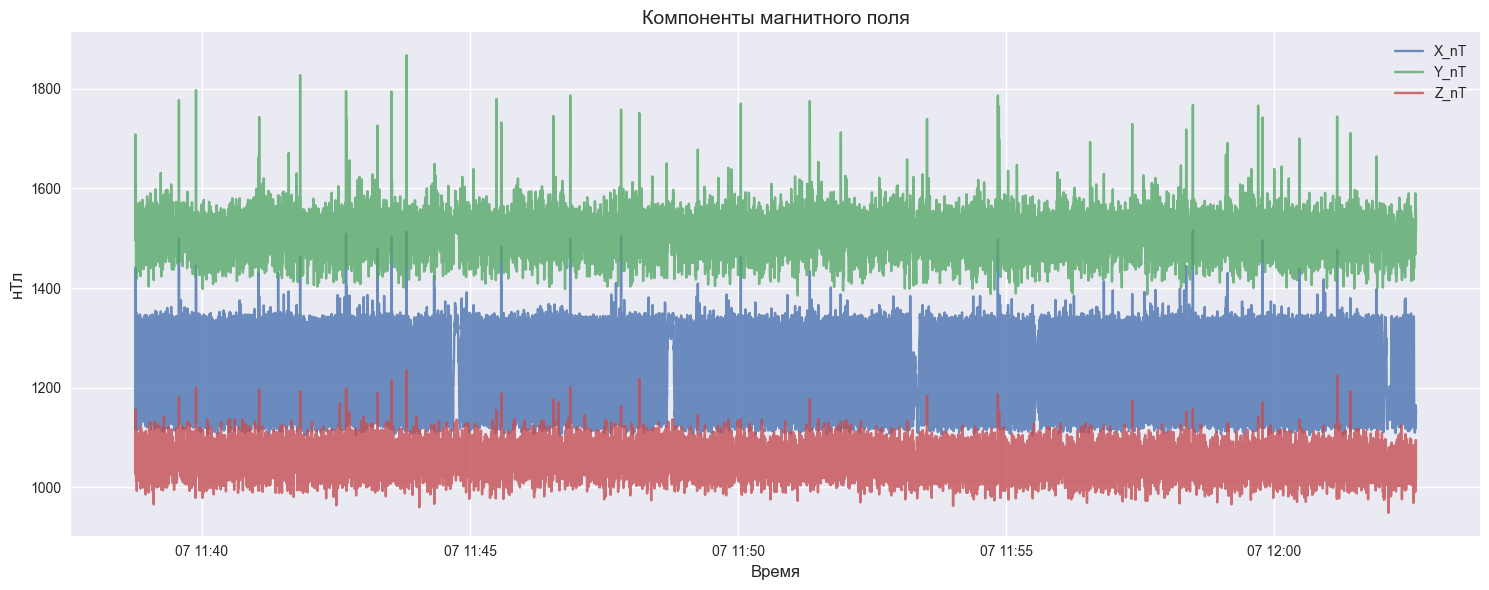

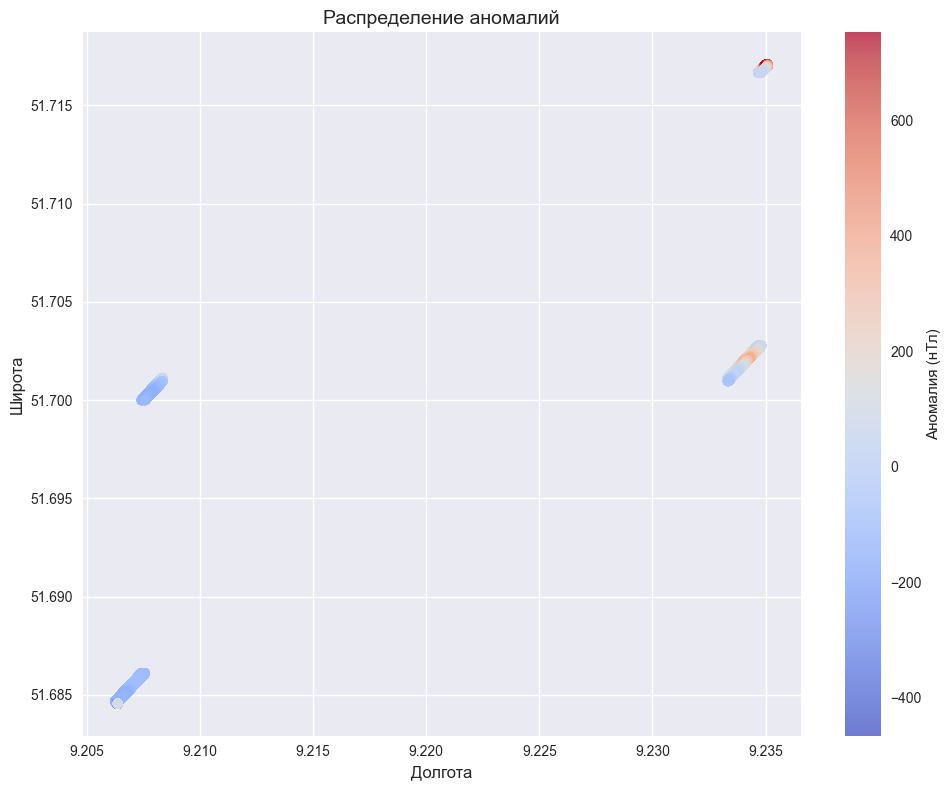

Ценок


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Конвертирует координаты в десятичные градусы
def dms_to_decimal(dms_str, hemisphere):
    degrees = float(dms_str[:2])
    minutes = float(dms_str[2:4])
    seconds = float(dms_str[4:9]) / 100  
    decimal = degrees + minutes/60 + seconds/3600
    if hemisphere in ['S', 'W']:
        decimal *= -1
    return decimal

# Читает и парсит файл
data = []
with open('MG.txt', 'r', encoding='utf-8') as file:
    for line in file:
        if line.startswith('2025'):  # Игнорирует служебные строки
            parts = line.split()
            try:
                # Парсинг
                record = {
                    'datetime': datetime.strptime(f"{parts[0]} {parts[1]}", "%Y/%m/%d %H:%M:%S.%f"),
                    'Mag1Field': float(parts[2]),
                    'Latitude': dms_to_decimal(parts[8], parts[9]),
                    'Longitude': dms_to_decimal(parts[10], parts[11]),
                    'Height_m': float(parts[12]) / 1000,
                    'X_nT': int(parts[16]),
                    'Y_nT': int(parts[17]),
                    'Z_nT': int(parts[18])
                }
                data.append(record)
            except (IndexError, ValueError, KeyError) as e: 
                print(f"Ошибка {line.strip()}")
                continue  # Пропускает проблемные строки

# Создает DataFrame
df = pd.DataFrame(data)

# Расчитывает маг аномалии
df['Mag_Anomaly'] = df['Mag1Field'] - df['Mag1Field'].mean()

# Стиль графиков
plt.style.use('seaborn-v0_8')

# 1. "График временного ряда аномалий"
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['Mag_Anomaly'], label='Магнитная аномалия', linewidth=1, color='blue')
plt.title('Магнитные аномалии', fontsize=14)
plt.xlabel('Время', fontsize=12)
plt.ylabel('нТл', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('anomaly_time_series.png', dpi=300)
plt.show()

# 2. "График компонентов маг поля"
plt.figure(figsize=(15, 6))
for component in ['X_nT', 'Y_nT', 'Z_nT']:
    plt.plot(df['datetime'], df[component], label=component, alpha=0.8)
plt.title('Компоненты магнитного поля', fontsize=14)
plt.xlabel('Время', fontsize=12)
plt.ylabel('нТл', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('field_components.png', dpi=300)
plt.show()

# 3. "Карта маг аномалий"
if df['Latitude'].nunique() > 1:  # Проверка, что координаты меняются
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        df['Longitude'], 
        df['Latitude'], 
        c=df['Mag_Anomaly'], 
        cmap='coolwarm', 
        s=50, 
        alpha=0.7
    )
    plt.colorbar(scatter, label='Аномалия (нТл)')
    plt.title('Распределение аномалий', fontsize=14)
    plt.xlabel('Долгота', fontsize=12)
    plt.ylabel('Широта', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('anomaly_map.png', dpi=300)
    plt.show()

# Сохраняет в CSV
df.to_csv('processed_magnetic_data.csv', index=False)
print("Ценок")
